#### Nama = `Ahmad Hamdani`
#### Nim = `233307092`
#### Kelas = `4D`

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import joblib


In [5]:
df = pd.read_csv("data/supervised_3_CarPrice_Assignment.csv")
df.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
# Pisahkan brand dari CarName
df['brand'] = df['CarName'].apply(lambda x: x.split(' ')[0].lower())

# Koreksi nama brand yang typo
df['brand'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen',
                     'toyouta':'toyota', 'porcshce':'porsche',
                     'maxda':'mazda'}, inplace=True)

# Drop kolom 'car_ID' dan 'CarName'
df.drop(['car_ID', 'CarName'], axis=1, inplace=True)

# Encode semua kolom kategorikal
cat_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])


C:\Users\ahmad\AppData\Local\Temp\ipykernel_16488\3309874517.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].replace({'vw':'volkswagen', 'vokswagen':'volkswagen',


In [7]:
X = df.drop('price', axis=1)
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [9]:
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(f"R2 Score: {r2:.2f}")


R2 Score: 0.96


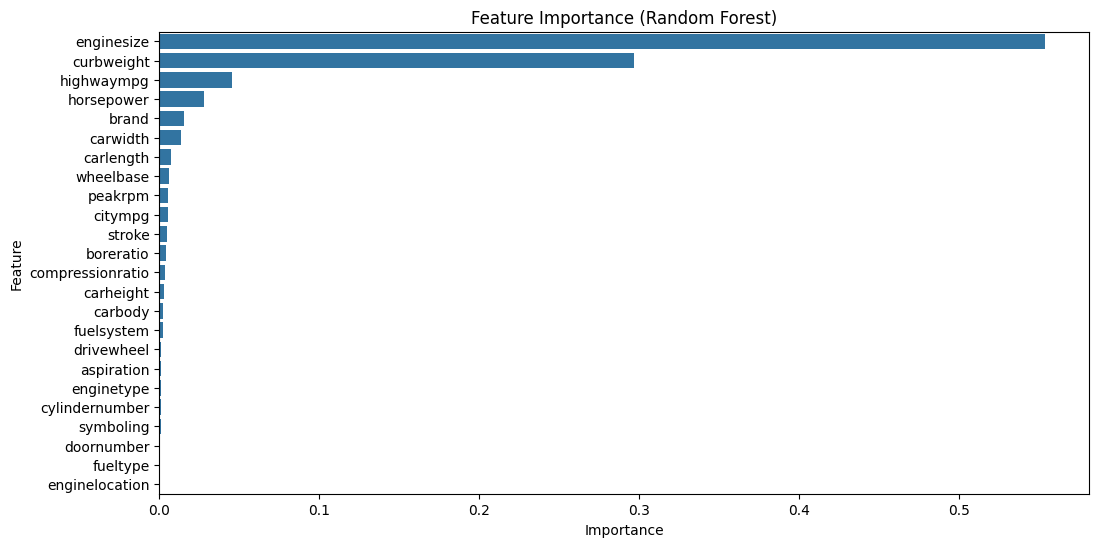

In [10]:
importances = rf_model.feature_importances_
feature_names = X.columns
feature_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_df = feature_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x='Importance', y='Feature', data=feature_df)
plt.title("Feature Importance (Random Forest)")
plt.show()


In [11]:
# 7. Save model
joblib.dump(rf_model, 'trained_random_forest_model.pkl')
print("Model berhasil disimpan sebagai 'trained_random_forest_model.pkl'")

Model berhasil disimpan sebagai 'trained_random_forest_model.pkl'
